In [1]:
import pandas as pd

autos = pd.read_csv("../../../data/autos.csv")

In [2]:
#대상 인코딩 >> 기능의 범주를 대상으로 파생된 일부 숫자로 대체 
# 범주형 데이터를 인코딩할때 사용함 / 지도학습문제에 유용함 
autos["make_encoded"] = autos.groupby("make")['price'].transform('mean')
autos["make_encoded"]

0      15498.333333
1      15498.333333
2      15498.333333
3      17859.166667
4      17859.166667
           ...     
188    18063.181818
189    18063.181818
190    18063.181818
191    18063.181818
192    18063.181818
Name: make_encoded, Length: 193, dtype: float64

In [3]:
autos.columns

Index(['symboling', 'make', 'fuel_type', 'aspiration', 'num_of_doors',
       'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price',
       'make_encoded'],
      dtype='object')

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
warnings.filterwarnings('ignore')


df = pd.read_csv("../../../data/movielens1m.csv")
df = df.astype(np.uint8, errors='ignore') 
print("Number of Unique Zipcodes: {}".format(df["Zipcode"].nunique()))

C:\Users\Master\AppData\Local\Temp\ipykernel_12776\3262280659.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


Number of Unique Zipcodes: 3439


In [7]:
df.shape

(1000209, 28)

In [18]:
df.head()

,Movie ID,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Unknown,War,Western,(no genres listed),User ID,Age,Gender,Occupation,Zipcode,Rating
0,b'3107',1,0,0,0,0,0,0,1,0,...,0,0,0,0,b'130',35,1,18,b'50021',5
1,b'2114',0,0,0,0,0,0,0,1,0,...,0,0,0,0,b'3829',25,0,0,b'22307',4
2,b'256',0,0,0,0,1,0,0,0,0,...,0,0,0,0,b'1265',18,0,21,b'49321',1
3,b'1389',1,0,0,0,0,0,0,0,0,...,0,0,0,0,b'2896',18,1,14,b'60073',5
4,b'3635',1,0,0,0,0,0,0,0,0,...,0,0,0,0,b'5264',18,1,17,b'15217',4


In [10]:
x = df.copy()
y = x.pop('Rating')

#25%로 샘플링 뽑기
x_encode = x.sample(frac=0.25)
y_encode = y[x_encode.index]
# y_encode

#75%데이터 
x_pretrain = x.drop(x_encode.index)
y_train = y[x_pretrain.index]
x_pretrain

,Movie ID,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Thriller,Unknown,War,Western,(no genres listed),User ID,Age,Gender,Occupation,Zipcode
0,b'3107',1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,b'130',35,1,18,b'50021'
2,b'256',0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,b'1265',18,0,21,b'49321'
4,b'3635',1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,b'5264',18,1,17,b'15217'
6,b'2289',0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,b'5294',25,1,1,b'60626'
7,b'3334',0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,b'2064',35,1,0,b'01020'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,b'2290',0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,b'4508',25,1,21,b'15701'
1000205,b'2643',1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,b'4167',25,1,21,b'22032'
1000206,b'593',0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,b'5799',25,1,3,b'80916'
1000207,b'1693',0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,b'3224',25,0,14,b'93428'


In [13]:
pip install category_encoders

   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   -------------------- ------------------- 41.0/81.9 kB 667.8 kB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 918.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
#Zipcode를 인코딩하는데 사용할 m-추정 인코더 구현
from category_encoders import MEstimateEncoder

#목표변수 Zipcode 평균을 계산  / m 얼마나 많은 증거가 필요한지 조정 
encoder = MEstimateEncoder(cols=['Zipcode'], m =5.0)
encoder.fit(x_encode, y_encode)

x_train = encoder.transform(x_pretrain)

In [15]:
x_train

,Movie ID,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Thriller,Unknown,War,Western,(no genres listed),User ID,Age,Gender,Occupation,Zipcode
0,b'3107',1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,b'130',35,1,18,3.765409
2,b'256',0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,b'1265',18,0,21,3.308120
4,b'3635',1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,b'5264',18,1,17,3.818100
6,b'2289',0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,b'5294',25,1,1,3.621063
7,b'3334',0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,b'2064',35,1,0,3.810918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,b'2290',0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,b'4508',25,1,21,3.262626
1000205,b'2643',1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,b'4167',25,1,21,3.849693
1000206,b'593',0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,b'5799',25,1,3,3.726582
1000207,b'1693',0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,b'3224',25,0,14,3.783808


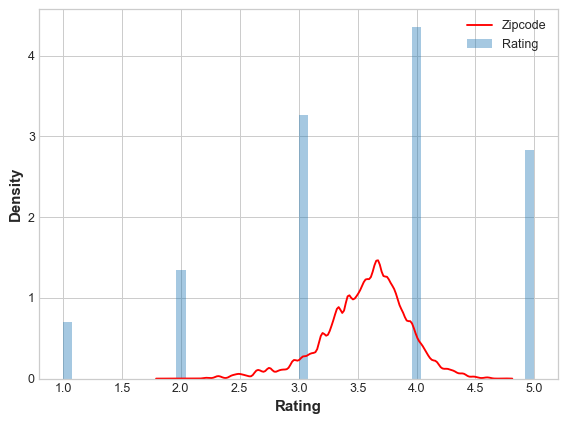

In [17]:
plt.figure(dpi=90)
ax = sns.distplot(y, kde=False, norm_hist=True)
ax = sns.kdeplot(x_train.Zipcode, color='r', ax=ax)
ax.set_xlabel("Rating")
ax.legend(labels=['Zipcode', 'Rating']);